<a href="https://colab.research.google.com/github/Deok-Hun/Aiffel_Kun/blob/master/EX_9_%EC%9D%B8%EB%AC%BC_%EB%AA%A8%EB%93%9C_%EB%AC%B8%EC%A0%9C%EC%A0%90_%EC%B0%BE%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip3 install pycocotools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip3 install pixellib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
thinc 8.1.3 requires typing-extensions<4.2.0,>=3.7.4.1; python_version < "3.8", but you have typing-extensions 4.4.0 which is incompatible.
tensorflow 2.6.0+zzzcolab20220506153740 requires typing-extensions~=3.7.4, but you have typing-extensions 4.4.0 which is incompatible.
spacy 3.4.1 requires typing-extensions<4.2.0,>=3.7.4; python_version < "3.8", but you have typing-extensions 4.4.0 which is incompatible.
jax 0.3.21 require

In [4]:
!pip3 install tensorflow==2.6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.4.0
    Uninstalling typing-extensions-4.4.0:
      Successfully uninstalled typing-extensions-4.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
jax 0.3.21 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
black 22.10.0 requires typing-extensions>=3.10.0.0; python_version < "3.10", but you have typing-extensions 3.7.4.3 which is incompatible.


In [5]:
!pip3 install keras==2.6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# os: Operating System의 줄임말로, 운영체제에서 제공되는 여러 기능을 파이썬에서 사용할 수 있도록 함 (Ex. 디렉토리 경로 이동, 시스템 환경 변수 가져오기 등)
# urllib: URL 작업을 위한 여러 모듈을 모은 패키지. (Ex. urllib.request, urllib.parse, ...)
# cv2: OpenCV 라이브러리로, 실시간 컴퓨터 비전을 목적으로 한 프로그래밍 라이브러리
# numpy(NumPy): 행렬이나 대규모 다차원 배열을 쉽게 처리할 수 있도록 지원하는 라이브러리. 데이터 구조 외에도 수치 계산을 위해 효율적으로 구현된 기능을 제공
# pixellib: 이미지 및 비디오 segmentation을 수행하기 위한 라이브러리. 
# pixellib.semantic: segmentation 기법 중, semantic segmentation을 쉽게 사용할 수 있도록 만든 라이브러리
# matplotlib: 파이썬 프로그래밍 언어 및 수학적 확장 NumPy 라이브러리를 활용한 플로팅 라이브러리로, 데이터 시각화 도구
import os
import urllib
import cv2
import numpy as np
import pixellib
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

In [9]:
os.environ["HOME"]=""
print(os.getenv("HOME"))

# 동일 이미지 블러 처리하기

(450, 800, 3)


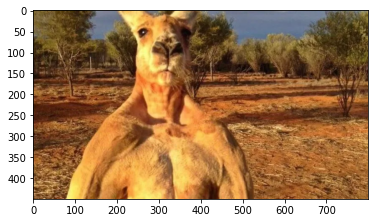

In [11]:
# os 모듈에 있는 getenv() 함수를 이용하여 읽고싶은 파일의 경로를 file_path에 저장
# 준비한 이미지 파이르이 경로를 이용하여 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장
img_path = os.getenv('HOME')+'/content/drive/MyDrive/Exploration/Exploration_9/data/rogerkangaroo.png'
img_orig = cv2.imread(img_path)

print(img_orig.shape)

# cv2.cvtColor(입력 이미지, 색상변환코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

# plt.show(): 현재 열려있는 모든 figure를 표시(여기서 figure는 이미지, 그래프 등)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

## 세그멘테이션으로 사람 분리하기

## simentic segmentation 다뤄보기

### DeepLab 모델 이용

In [12]:
# os.path.join(a,b)는 경로를 병합하여 새 경로 생성
# model_file에 "" 저장

model_dir = os.getenv('HOME')+'/content/drive/MyDrive/Exploration/Exploration_9/model'
model_file = os.path.join(model_dir,'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드
# (urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 후 model_file에 파일명으로 저장)
urllib.request.urlretrieve(model_url, model_file)

('/content/drive/MyDrive/Exploration/Exploration_9/model/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7fa5180f8a90>)

### 다운로드 한 모델을 이용해 Pixellib로 프로젝트에 사용할 세그멘테이션 모델을 생성

In [13]:
# PixelLib 라이브러리에서 가져온 클래스를 semantic segmentation을 수행하는 클래스 인스턴스를 만듦
model = semantic_segmentation()

# pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출
model.load_pascalvoc_model(model_file)

In [14]:
# segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할하고, 
# 분할된 출력물의 배열을 가져옴, 분할은 pacalvoc 데이터로 학습된 모델을 이용
segvalues, output = model.segmentAsPascalvoc(img_path)

### Pascalvoc 데이터 라벨 확인하기

In [15]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

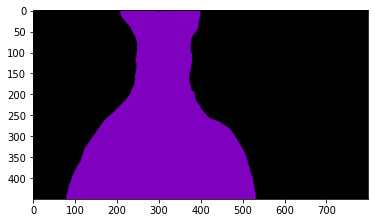

In [16]:
# segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중
# output을 matplotlib를 이용해 출력
plt.imshow(output)   # segvalues, output = model.segmentAsPascalvoc(img_path)
plt.show()

In [17]:
# segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력
segvalues 

{'class_ids': array([ 0, 13]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

### output 라벨 확인하기

In [18]:
# PixelLib에서 그대로 가져온 코드
# 주목해야 할 것은 생상 코드 결과물!

#컬러맵 만들기
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [26]:
colormap[13]

array([192,   0, 128])

In [27]:
# 색상순서 변경 - colormap 에 의한 배열은 RGB 순이며, output의 배열 순서는 BRG 이다.
seg_color = (128,0,192)

#### seg_color로 이루어진 마스크 만들기

(450, 800)


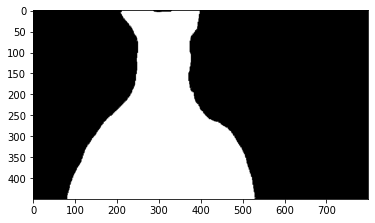

In [28]:
# output의 픽셀별로 색상이 seg_color와 같다면 1(True), 다르면 0(False)
# seg_color[15] 값이 person 이므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인 가능
seg_map = np.all(output == seg_color, axis = -1)
print(seg_map.shape)
plt.imshow(seg_map, cmap = 'gray')
plt.show()

### 원본 이미지와 겹쳐 보기

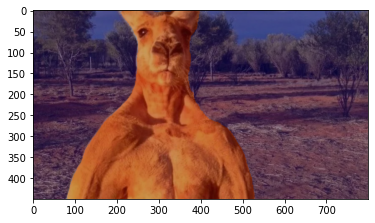

In [29]:
# 원본이미지를 img_show에 할당한 뒤 이미지에 사람이 있는 위치와 배경을 분리해서 표현한
# color_mask를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True와 False인 값을 각각 255 와 0 으로 바꾼다.
img_mask = seg_map.astype(np.uint8) * 255

# 255 와 0 을 적당한 색상으로 바꾼다.
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본이미지와 마스크를 합쳐본다.
# 0.6 과 0.4는 두 이미지를 섞는 비율
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## 배경 흐리게 하기(blur)

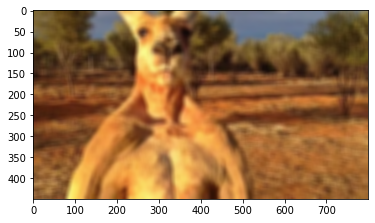

In [30]:
img_orig_blur = cv2.blur(img_orig, (13,13)) # (13,13)은 blurring kernel size를 뜻한다.

plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

### 흐려진 이미지에서 segmentation mask를 이용하여 배경만 추출

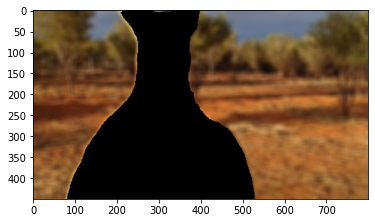

In [31]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전된다.
# 배경:0, 사람:255 --> 배경:255, 사람:0
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있다.
# 원리는 mask 영역에서 서로 공통으로 겹치는 부분을 출력한다.
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
# img_orig_blur(바로 위 전체 blur처리된 이미지)와 img_bg_mask(바탕이 백색, 사람이 흑색)이미지 2부분 중 겹치는 부분
# 즉, 배경부분만 blur 처리되고 사람이 있는 공간은 비워진(흑색) 으로 만든다.

plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

## 흐린 배경(blur)과 원본 영상 합성

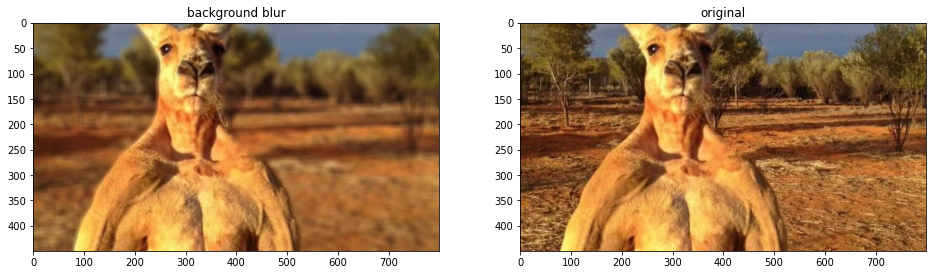

In [42]:
# np.where(조건, 참일때, 거짓일때)
# segmentation mask 가 255인 부분만 원본 이미지 값을 가지고
# 아닌 영역은 블러된 배경만 있는 이미지 값을 사용한다.
img_concat = np.where(img_mask_color == 255, img_orig, img_bg_blur)

plt.figure(figsize = (16,26))

plt.subplot(1,2,1)
plt.title('background blur')
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))

plt.subplot(1,2,2)
plt.title('original')
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))

plt.show()

# 인물 이미지 블러 처리하기

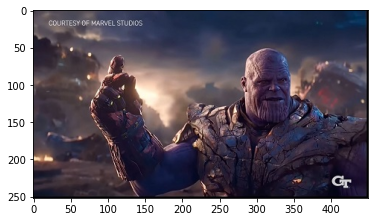

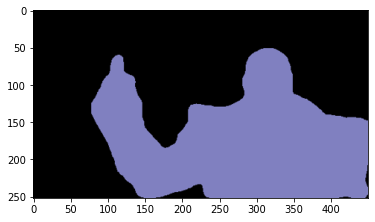

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [44]:
img_path = os.getenv('HOME')+'/content/drive/MyDrive/Exploration/Exploration_9/data/Tanos.png'
img_orig = cv2.imread(img_path)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

model_dir = os.getenv('HOME')+'/content/drive/MyDrive/Exploration/Exploration_9/model'
model_file = os.path.join(model_dir,'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 
urllib.request.urlretrieve(model_url, model_file)

model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

segvalues, output = model.segmentAsPascalvoc(img_path)

plt.imshow(output)   # segvalues, output = model.segmentAsPascalvoc(img_path)
plt.show()

segvalues


colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

In [45]:
segvalues

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True, False],
        [False, False, False, ...,  True,  True, False],
        [False, False, False, ..., False, False, False]])}

In [46]:
colormap[15]

array([192, 128, 128])

In [47]:
seg_color = (128,128,192)

(252, 450)


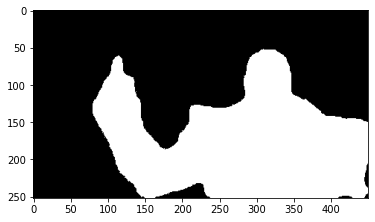

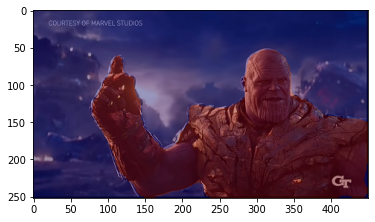

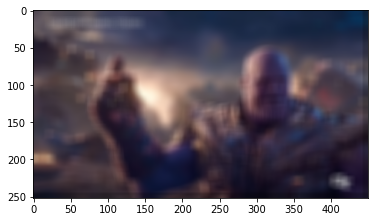

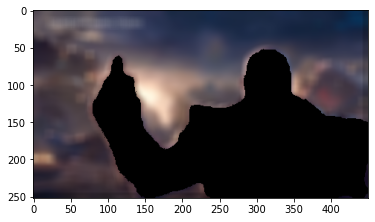

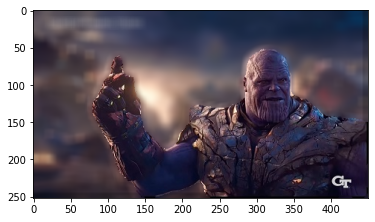

In [48]:
seg_map = np.all(output == seg_color, axis = -1)
print(seg_map.shape)
plt.imshow(seg_map, cmap = 'gray')
plt.show()


# 원본이미지를 img_show에 할당한 뒤 이미지에 사람이 있는 위치와 배경을 분리해서 표현한
# color_mask를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True와 False인 값을 각각 255 와 0 으로 바꾼다.
img_mask = seg_map.astype(np.uint8) * 255

# 255 와 0 을 적당한 색상으로 바꾼다.
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본이미지와 마스크를 합쳐본다.
# 0.6 과 0.4는 두 이미지를 섞는 비율
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()


img_orig_blur = cv2.blur(img_orig, (13,13)) # (13,13)은 blurring kernel size를 뜻한다.

plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()


img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전된다.
# 배경:0, 사람:255 --> 배경:255, 사람:0
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있다.
# 원리는 mask 영역에서 서로 공통으로 겹치는 부분을 출력한다.
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
# img_orig_blur(바로 위 전체 blur처리된 이미지)와 img_bg_mask(바탕이 백색, 사람이 흑색)이미지 2부분 중 겹치는 부분
# 즉, 배경부분만 blur 처리되고 사람이 있는 공간은 비워진(흑색) 으로 만든다.

plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

# np.where(조건, 참일때, 거짓일때)
# segmentation mask 가 255인 부분만 원본 이미지 값을 가지고
# 아닌 영역은 블러된 배경만 있는 이미지 값을 사용한다.
img_concat = np.where(img_mask_color == 255, img_orig, img_bg_blur)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()


# 배경전환 크로마키

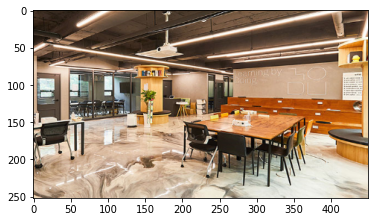

In [57]:
img_path_1 = os.getenv('HOME')+'/content/drive/MyDrive/Exploration/Exploration_9/data/aiffel.png'
img_orig_1 = cv2.imread(img_path_1)
img_orig_1 = cv2.resize(img_orig_1, (450, 252))  # 인물 또는 사물이 있는 메인 이미지 사이즈와 배경 사이즈를 일치시켜준다

plt.imshow(cv2.cvtColor(img_orig_1, cv2.COLOR_BGR2RGB))
plt.show()

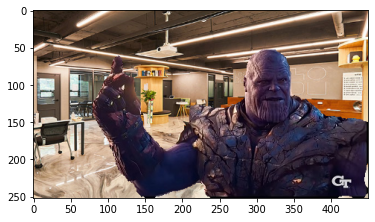

In [56]:
img_concat = np.where(img_mask_color == 255, img_orig, img_orig_1)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 정리

  * 1. 원본 이미지에서 사람과 배경을 분리한다.
  * 2. 분리된 이미지에서 mask 처리하여 target 값(사람: 255, 배경: 0) 으로 처리한다.
  * 3. 원본 이미지를 blur 처리한다.
  * 4. 기존 mask 처리된 값을 반전시킨다.(사람: 0, 배경: 255)
  * 5. 블러된 이미지와 반전된 mask를 이용하여 블러된 이미지에 사람이 있는 공간을 mask 처리한다(bitwise_and)
  * 6. np.where를 이용하여 사람인 경우 원본이미지를 적용하고 배경인 경우 블러처리 하여 이미지를 만든다.
  * 7. 크로마키의 경우 메인 이미지와 배경이되는 이미지의 사이즈는 서로 일치되어야 한다.

# 인물 모드 에서 나타나는 문제점
  * 아래 첫 번째 사진은 Ex.9 의 예제에서 다루었던 사진이다. 사진을 블러(blur) 처리해서 정확한 처리가 되었는지는 완성된 이미지를 육안으로 판별하기 힘들다. 따라서, 원하는 부분(배경)만 블러가 처리 되었는지 알기위해서는 처음 분리 후 다시 합쳐 볼때 색상차이로 확인하는 것이 정확하다.
  * 아래 사진에서 보이는 문제점은 명확하다. 원하는 부분 즉, 배경이 아닌 부분을 추출하는 단계에서부터 제대로 추출되지 않았음을 확인할 수 있다.
  * 다음 두 번째 사진은 실습에서 다루었던 이미지이다.
  * 두 번째 이미지에서 보이는 문제점 역시 첫 번째 이미지에서와 마찬가지로 배경과 사물을 추출할 때 사물을 정확하게 추출하지 못 한 것을 알 수 있다.

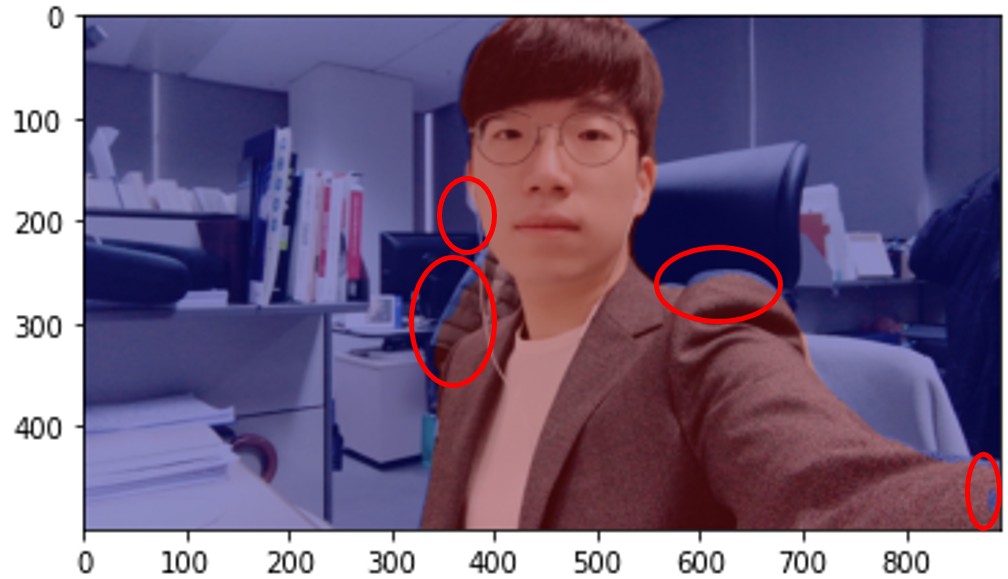

In [59]:
from PIL import Image

img_path_p1 = os.getenv('HOME')+'/content/drive/MyDrive/Exploration/Exploration_9/painpoint1.PNG'
img_p1 = Image.open(img_path_p1)
img_p1

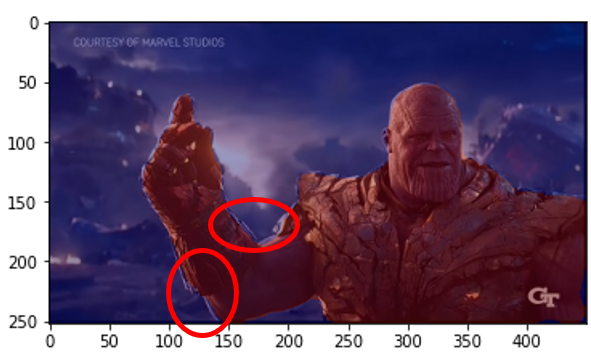

In [60]:
img_path_p2 = os.getenv('HOME')+'/content/drive/MyDrive/Exploration/Exploration_9/painpoint2.PNG'
img_p2 = Image.open(img_path_p2)
img_p2

# 솔루션 제시
  * 배경과 사물을 정확하게 분리하기 위해서는 모델 학습과정 즉, segmentation 에서 보완이 필요하다. 제시하는 보완방법은 다음과 같다.
    1. 첫 번째 분리 학습 후 분리 주변부를 한 번 더 학습한다.
    2. 두 번째 학습시에는 하이퍼파마미터 즉, padding 과 stide 부분을 더 세밀하게 조정한다.
  * 위 와 같이 솔루션을 제시하는 이유는, 모델 학습을 첫 번째 는 크게 봐서 시간을 단축하고, 오버피팅을 방지하는 이유가 첫 번째이고, 패딩값 조정은 위 이미지에서 나타난 문제점들이 모두 분리되는 사물의 윤곽쪽에서 나타나기 때문이다. 또한 stide값을 조정함으로써 윤곽부분을 조금 더 자세히 들여다 볼 필요가 있기 때문이다.
  * 위 내용은 앙상블(CNN 과 RNN)의 원리를 착안했으며, 패딩 및 스트라이드는 이론적인 부분을 생각했다.